# Analytically finding a Model

In this notebook I just want to find a **linear model** that fits a given dataset. <br>
The linear model will be **without intercept**, so in the form $y = wx$. <br>
What I will go through is: 
 * Define a loss function (it will be the MSE)
 * **Given the data** find the equation of the loss function with respect to the weights of the model $w$
 * Analytically find the weight $w$ that minimizes the error on the data
 * Show graphically that this is indeed the best possible weight
 * Plot the found model against the data

Through this I can also see how quickly complicated solving analytically an ML problem becomes the **higher the dimensions**. <br>
A 2-dimensional problem already takes **2 to 10 times more** time to solve than a 1-dimensional problem. <br>
So I can imagine what it must be like to solve a 100-dimensional problem! 

In [76]:
!pip install seaborn

In [107]:
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import time

In [99]:
# Let's invent some data for training as a pair of (x, y)
# This training data cannot be perfectly fitted by a linear model: there will always be an error
data = [(1, 1), (2, 1), (3, 3), (4, 4)]

x = np.array([point[0] for point in data])
y = np.array([point[1] for point in data])

# Let's define the error function
def loss_mse(y_true, y_pred):
    return np.sum(np.square((y_pred - y_true))) / len(y_true)

def test_loss():
    y_true = np.array([1, 4, 2, 5, 3, 4, 5, 34, 7, 4, 2])
    y_pred = np.array([2, 6, 2, 1, 3, 5, 4, 13, 6, 4, 2])

    print(f"Testing my loss function\n")
    print(f"My MSE: {loss_mse(y_true, y_pred)}")
    print(f"SKlearn MSE: {mean_squared_error(y_true, y_pred)}")

In [79]:
class LinearModel:

    def __init__(self, weights): 
        self.weights = weights

    def predict(self, x):
        y_pred = self.weights * x 
        return y_pred

The following function finds the coefficients of the loss function (using MSE) with regards to $w$ using the data. 

Considering that $MSE = \frac{i}{n} * \sum_1^n{(wx-y)^2}$ where $w$ is the weight that we're trying to find. <br>
That means that by using the data that we have, we can convert this in the form $MSE = c_0w^2 + c_1w + c_2$

The following function finds those $c_0$, $c_1$ and $c_2$

In [97]:
def calclulate_loss_coefficients(x, y): 
    """
    Assumes a linear function with no intercept. 
    The error will have the form c0*w^2 + c1*w + c2
    """
    c0 = np.sum(x**2) / len(x)
    c1 = (-2 * np.sum(x*y)) / len(x)
    c2 = np.sum(y**2) / len(x)
    
    return c0, c1, c2
    

To find a best model analytically, I just need to find the $w$ that **minimizes the error**. <br>

That can obviously be found by solving $\frac{\delta{L}}{\delta{w}} = 0$, which is equivalent to solving <br>
$2c_0w + c_1 = 0$

So analytically, the best $w$ (the one that finds the best model fitting the data) is $w = -\frac{c_1}{2c_0}$

In [98]:
def find_best_w(x, y):
    c0, c1, c2 = calclulate_loss_coefficients(x, y)

    return -c1/(2*c0)

In [100]:
print(f"The best w given the data is: {find_best_w(x, y)}")

The best w given the data is: 0.9333333333333333


Now let's plot the following: 
 * The **loss function** with regards to $w$
 * The **best $w$**, calculated according to the formula above
 * The **line $Loss = 0$**, to show that based on the data, it might be that there is no perfect solution (solution with $Loss = 0$)

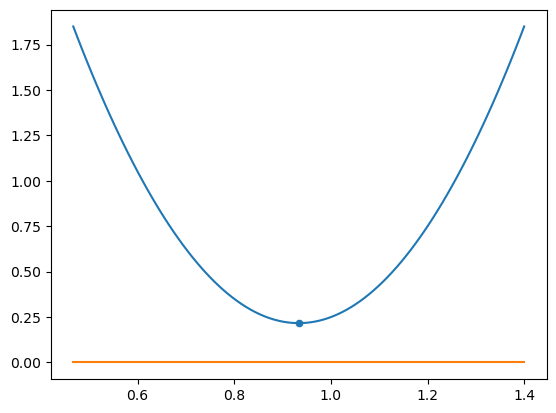

In [101]:

# Let's get data to plot the loss function 
c0, c1, c2 = calclulate_loss_coefficients(x, y)

best_w = find_best_w(x, y)

x_min = best_w - best_w / 2
x_max = best_w + best_w / 2

w = np.linspace(x_min, x_max, 100)
y_loss = c0*(w**2) + c1*w + c2

# Let's plot the loss function (parameter is w)
sns.lineplot(x=w, y=y_loss)
sns.lineplot(x=np.linspace(x_min, x_max, 10), y=[0]*10)

# w_min is the value of w that minimizes the error that I found analytically by solving the differential equation
sns.scatterplot(x=[best_w], y=[c0*(best_w**2) + c1*best_w + c2])

plt.show()

And now finally, let's plot our "analytically learned" model and the data it was learned from. 

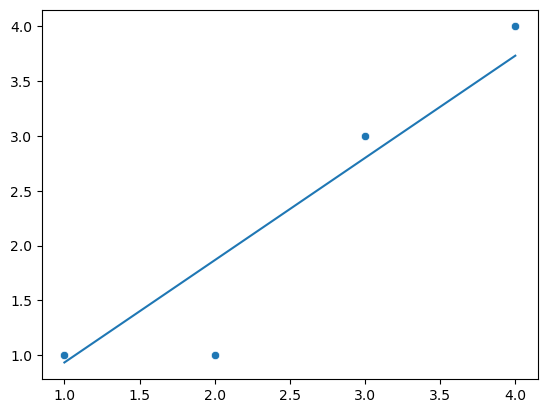

In [102]:
model = LinearModel(best_w)
y_pred = model.predict(x)

sns.scatterplot(x=x, y=y)
sns.lineplot(x=x, y=y_pred)
plt.show()

In [103]:
# What's the residual error? 
print(f"Residual MSE after finding the best w: {loss_mse(y, y_pred)}")

Residual MSE after finding the best w: 0.2166666666666667


## Generating data
I'm now going generate data for training using a simple equation (e.g. $y=x$) to which I will add some Gaussian noise. <br>
I will then use the data to learn the best $w$. 

My goal is to both generalize and measure how much time it takes to compute an "analytical model". 

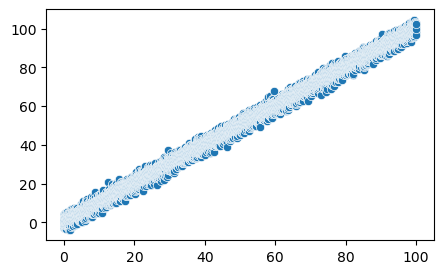

In [111]:
# Generating y=x data
num_data_points = 10000
x = np.linspace(0, 100, num_data_points)
y = np.linspace(0, 100, num_data_points)

# Adding gaussian noise to the y
y_noise = np.random.normal(size=num_data_points, scale=2)

y = y + y_noise

# Let's plot what I generated 
plt.figure(figsize=(5, 3))

sns.scatterplot(x=x, y=y)

plt.show()

Now that we have data, let's find the best $w$. 

The learning process took 0.000519 seconds
The residual MSE is: 4.0131482669975735


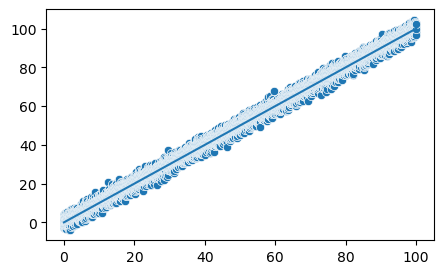

In [113]:
start_time = time.time()
best_w = find_best_w(x, y)
end_time = time.time()

print(f"The learning process took {end_time - start_time:.6f} seconds")

model = LinearModel(best_w)
y_pred = model.predict(x)

print(f"The residual MSE is: {loss_mse(y, y_pred)}")

plt.figure(figsize=(5, 3))

sns.scatterplot(x=x, y=y)
sns.lineplot(x=x, y=y_pred)
plt.show()

Now we can see that even with **10.000** data points, **it takes no time** to solve this super simple model analytically. 

## What about a two-dimensional problem?

We will now try to use the same logic to solve a problem in two dimensions, always analytically.

Now my equation will be in the form $y = w_0x_0 + w_1x_1$. <br>
I'm ignoring a bias term here too. 

Now, considering that we still use MSE as a loss function, and that MSE has the formula $L = (1/n) * \sum{(\hat{y}-y)^2}$, finding the best weights $w$ is equivalent to solving this system of differential equations: 

$\frac{\delta{L}}{\delta{w_0}}=0 \iff (2/n)*[w_0\sum{x_0^2} + \sum{x_0(w_1x_1-y)}] = 0$<br>
$\frac{\delta{L}}{\delta{w_1}}=0 \iff (2/n)*[w_1\sum{x_1^2} + \sum{x_1(w_0x_0-y)}] = 0$<br>

Solving for $w$: 

$w_0 = -\frac{\sum{x_0(x_1w_1 - y)}}{\sum{x_0^2}}$<br>
$w_1 = -\frac{\sum{x_1(x_0w_0 -y)}}{\sum{x_1^2}}$<br>

You solve this by substituing $w_0$ in the $w_1$ equation and get: 

$w_1 = \frac{s_0a - b}{s_0s_1 - c}$ where $s_i = \sum{x_i^2}$ and $a = \sum{x_1y}$ and $b = \sum{x_1x_0^2y}$ and $c = \sum{x_0^2x_1^2}$

I will generate data for $w_0=1$ and $w_1 = 2$ which would correspond to the equation $y = x_0 + 2x_1$.

In [133]:
from mpl_toolkits.mplot3d import Axes3D  # Import for 3D plotting
import plotly.express as px
import pandas as pd

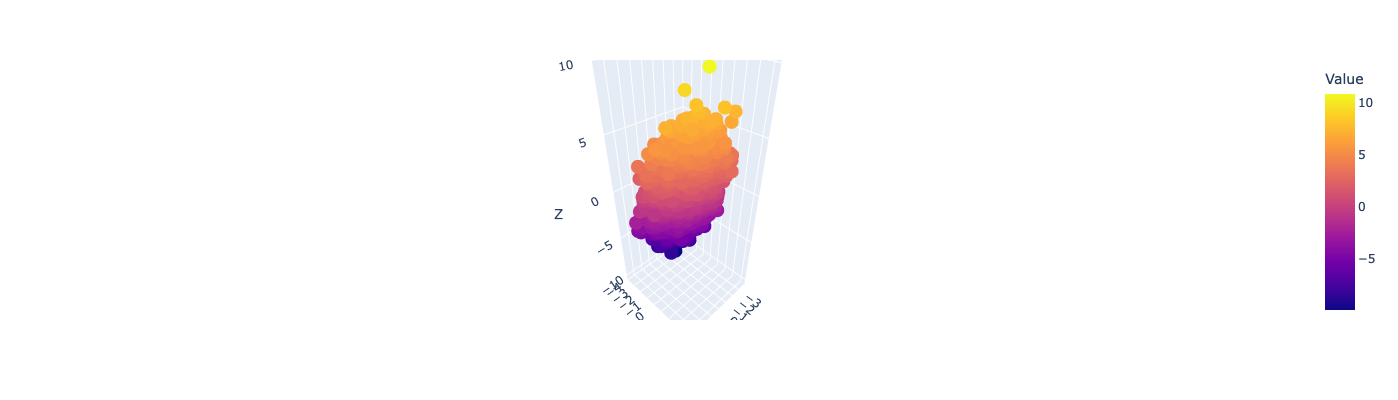

In [168]:
num_data_points = 10000

# Generating y = x0 + 2x1 data
x0 = np.random.randn(num_data_points)
x1 = np.random.randn(num_data_points)
noise = np.random.normal(size=num_data_points, scale=1)
y = x0 + 2*x1 + noise

# Create a DataFrame for Plotly
df = pd.DataFrame({'X': x0, 'Y': x1, 'Z': y, 'Value': y})  # You can use any column for coloring

fig = px.scatter_3d(df, x='X', y='Y', z='Z', color='Value', size_max=10)

fig.update_layout(
    width=900,  # Width in pixels
    height=400  # Height in pixels
)

fig.show()

In [142]:
def find_best_w_2dim(x, y): 
    """
    Finds the best possible w by analytically solving the differential equations above. 

    Params: 
    - x is a matrix of shape (2, num_data_points). The first element is x0, the second x1. 
    - y is an array (num_data_points,)
    """
    x0 = x[0]
    x1 = x[1]

    s1 = np.sum(x1**2)
    s0 = np.sum(x0**2)

    a = np.sum(x1 * y)
    b = np.sum(x1 * x0**2 * y)
    c = np.sum(x0**2 * x1**2)

    w1 = (s0*a - b) / (s0*s1 - c)

    w0 = - np.sum(x0 * (w1*x1 - y)) / s0

    return [w0, w1]
    

In [180]:
start_time = time.time()
best_w = find_best_w_2dim([x0, x1], y)
end_time = time.time()

y_pred = best_w[0]*x0 + best_w[1]*x1

print(f"Found best weights {best_w} in {end_time - start_time:.5f} seconds")
print(f"Residual error: {mean_squared_error(y, y_pred)}")


Found best weights [1.0849866976912805, 1.9533775163755152] in 0.00118 seconds
Residual error: 24.879812030993083


It worked! 

If I were to do the same thing but now with using more noise (higher variance of the noise), I'm expecting a lower accuracy (higher MSE): 

In [177]:
# Generating y = x0 + 2x1 data
x0 = np.random.randn(num_data_points)
x1 = np.random.randn(num_data_points)
noise = np.random.normal(size=num_data_points, scale=5)
y = x0 + 2*x1 + noise

start_time = time.time()
best_w = find_best_w_2dim([x0, x1], y)
end_time = time.time()

y_pred = best_w[0]*x0 + best_w[1]*x1

print(f"Found best weights {best_w} in {end_time - start_time:.5f} seconds")
print(f"Residual error: {mean_squared_error(y, y_pred)}")


Found best weights [1.0849866976912805, 1.9533775163755152] in 0.00080 seconds
Residual error: 24.879812030993083
